In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

In [3]:
customer_info=pd.read_csv('C:/Users/Milica/Desktop/segmentation data.csv')

In [4]:
customer_info.head(5)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [5]:
customer_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [6]:
customer_info = customer_info.drop(['ID'], axis=1)

In [7]:
num_columns=['Age','Income']
cat_columns=['Sex','Marital status','Education','Occupation','Settlement size']


In [8]:
def map_values():
    customer_info['Sex'] = customer_info['Sex'].map({0: 'Male',1:'Female'})
    customer_info['Marital status'] = customer_info['Marital status'].map({0: 'Single',1:'Non-single'})
    customer_info['Education'] = customer_info['Education'].map({0: 'Other/Unknown',1:'High school',2:'University',3:'Graduate school'})
    customer_info['Occupation'] = customer_info['Occupation'].map({0: 'Unemployed/Unskilled',1:'Skilled employee/official',2:'Management/self employed'})
    customer_info['Settlement size'] = customer_info['Settlement size'].map({0: 'small city',1:'mid sized city',2:'big city'})

In [9]:
map_values()

checking if there are missing values

In [10]:
missing_values = customer_info[cat_columns].isnull().sum()
print("Missing values in categorical columns:")
print(missing_values)

Missing values in categorical columns:
Sex                0
Marital status     0
Education          0
Occupation         0
Settlement size    0
dtype: int64


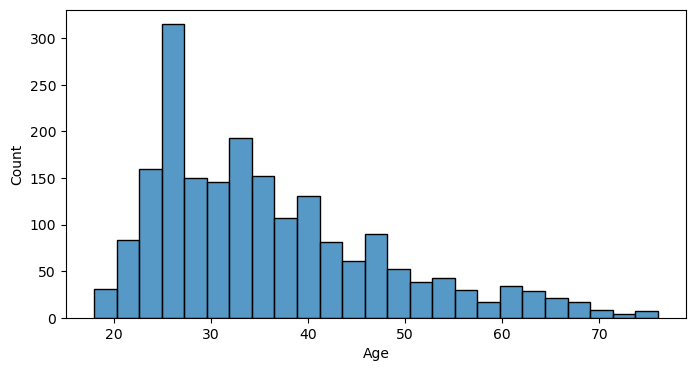

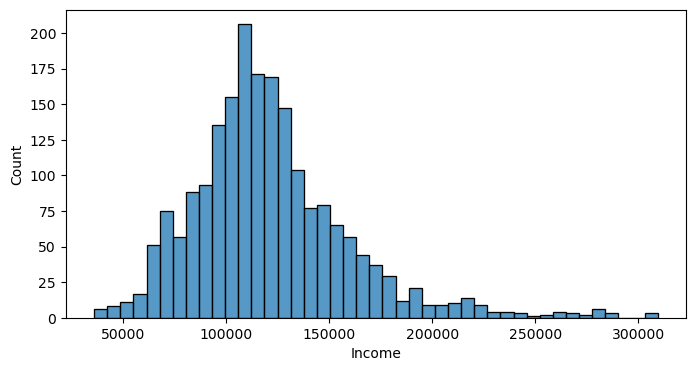

In [11]:
for numerical in num_columns:
    plt.figure(figsize=(8,4))
    sns.histplot(data=customer_info,x=numerical)


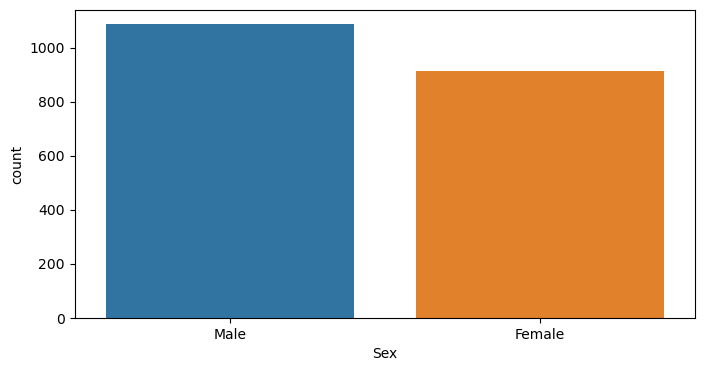

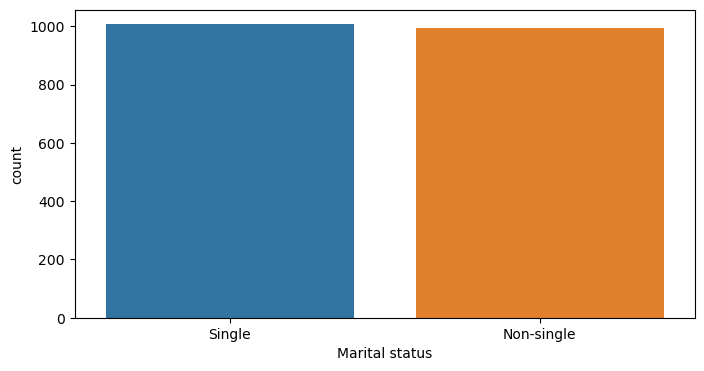

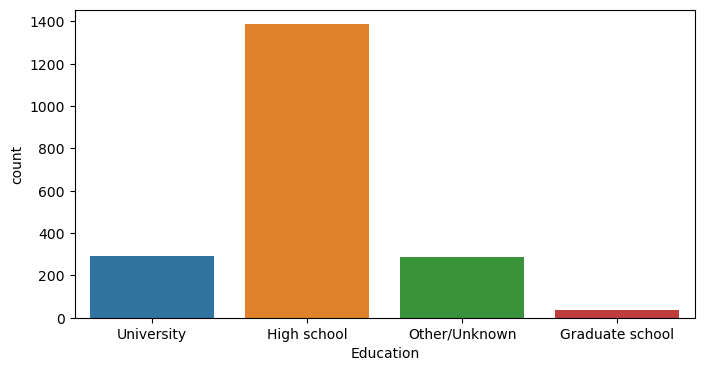

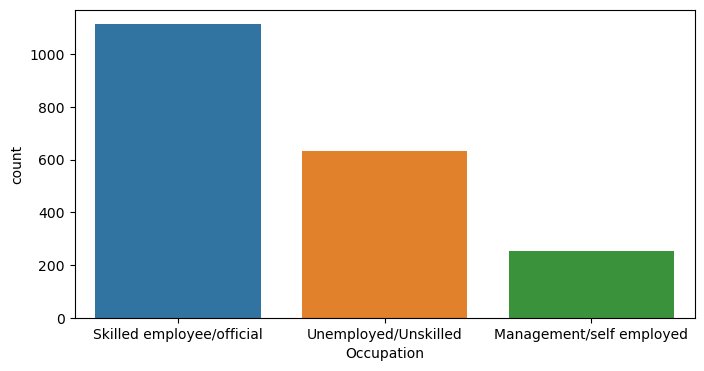

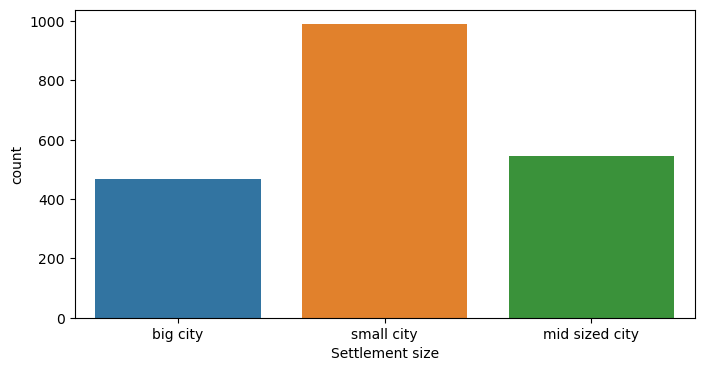

In [12]:
for category in cat_columns:
    plt.figure(figsize=(8,4))
    sns.countplot(data=customer_info,x=category)

lets see relationship between continuous variables

<Axes: xlabel='Age', ylabel='Income'>

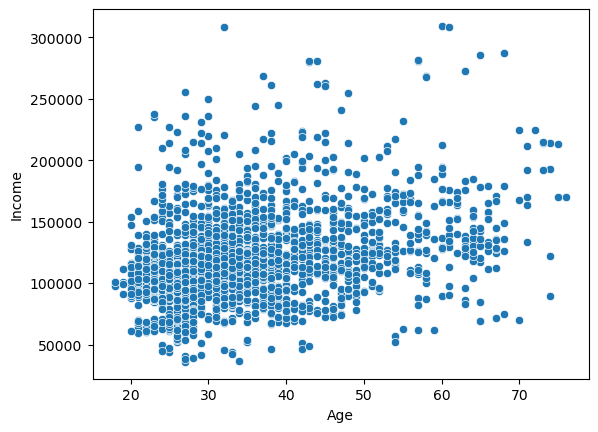

In [13]:
sns.scatterplot(x='Age',y='Income',data=customer_info)

In [14]:
import scipy.stats as stats
print(stats.pearsonr(customer_info['Age'],customer_info['Income']))

PearsonRResult(statistic=0.34061016373173514, pvalue=1.6443825442386822e-55)


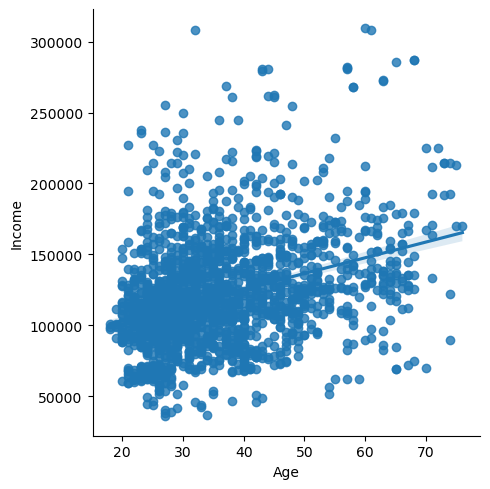

In [15]:
sns.lmplot(x='Age',y='Income',data=customer_info)

now lets show distibutions of categorical variables grouped by other categorical variables and after that generate countplot for
each pair of categorical variables

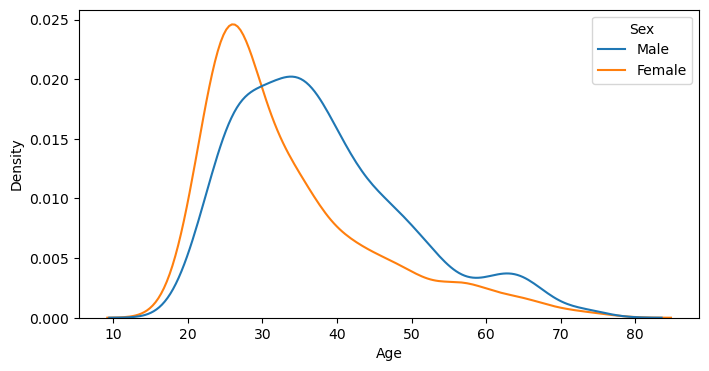

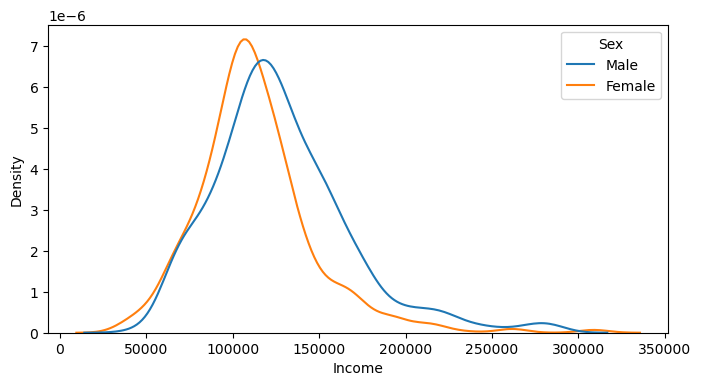

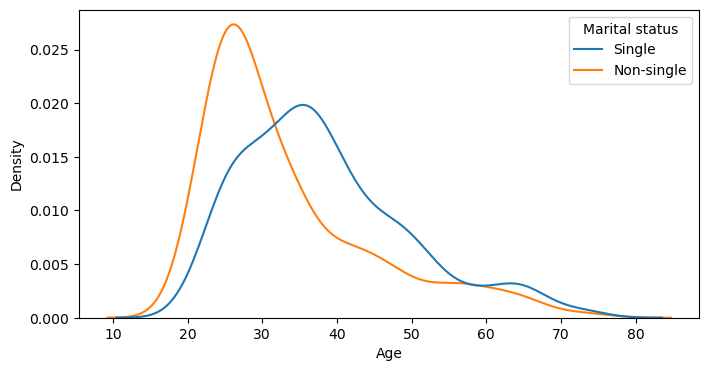

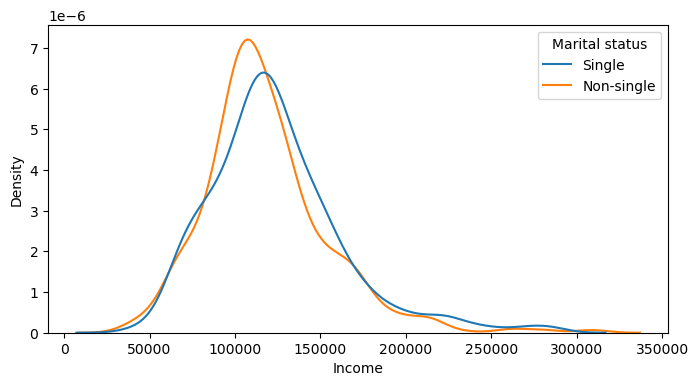

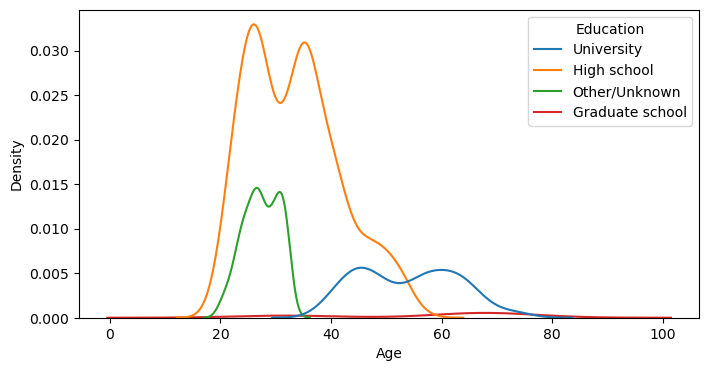

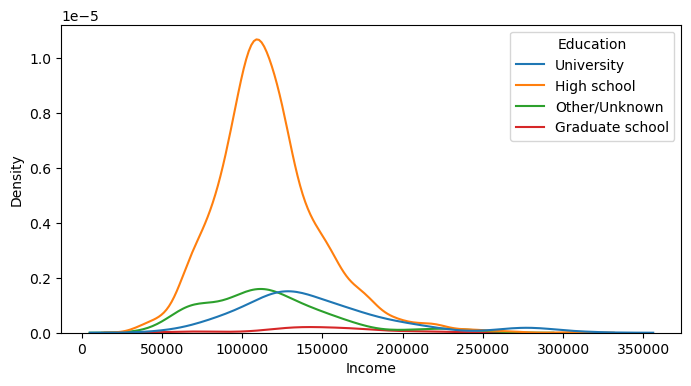

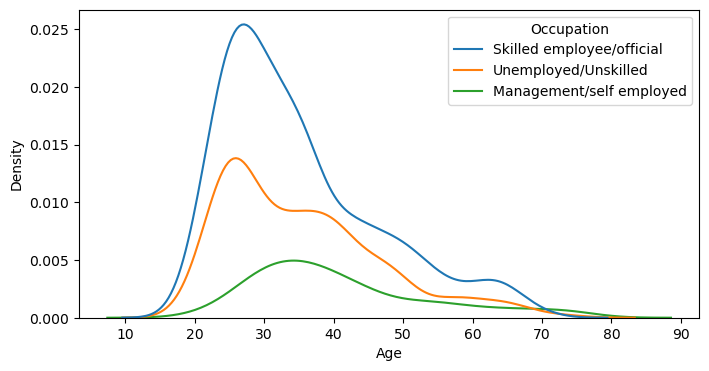

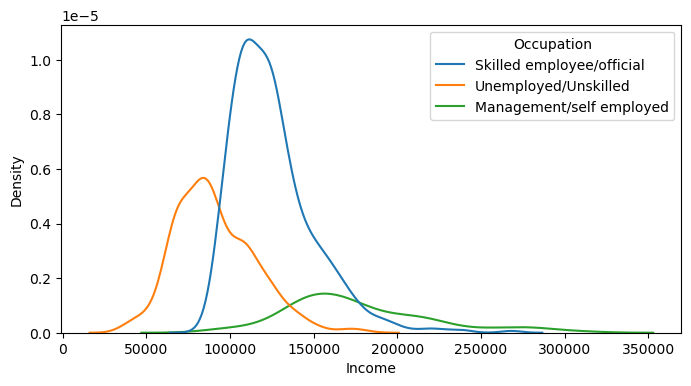

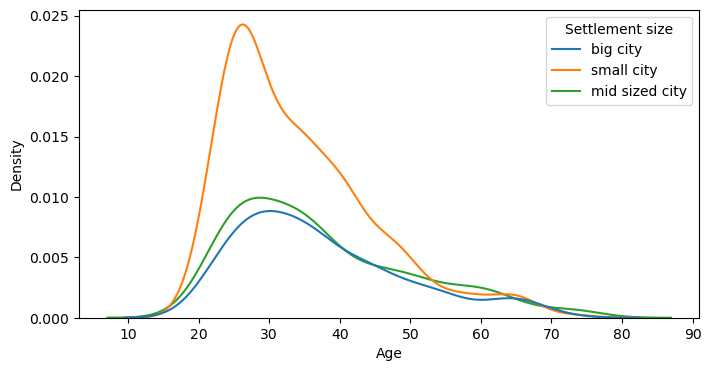

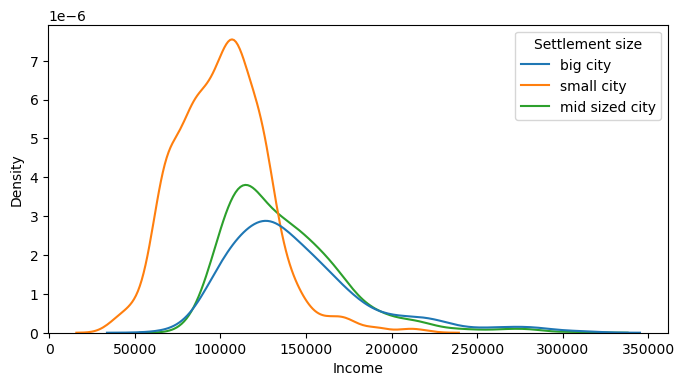

In [16]:
for category in cat_columns:
     for numerical in num_columns:
            if numerical != 'ID':
                plt.figure(figsize=(8,4))
                sns.kdeplot(customer_info,x=numerical,hue=category)

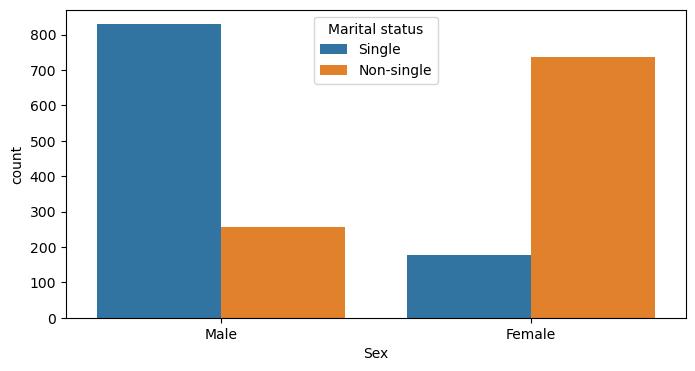

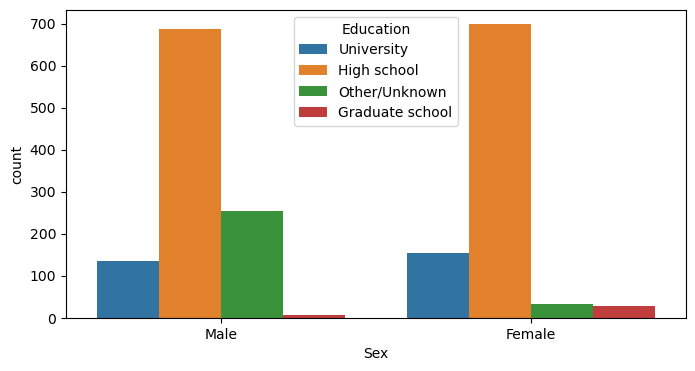

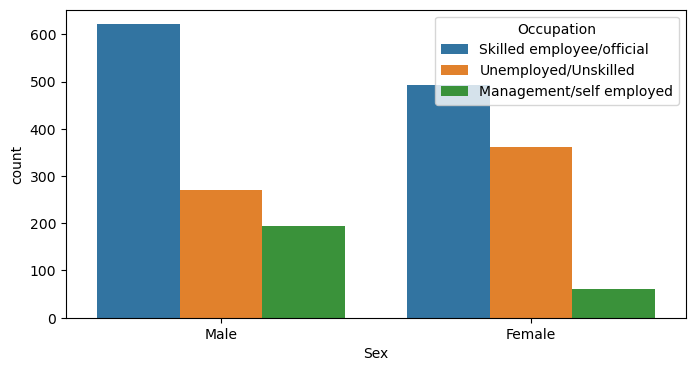

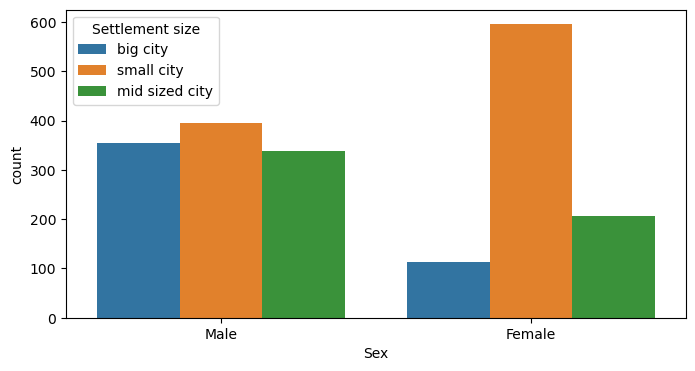

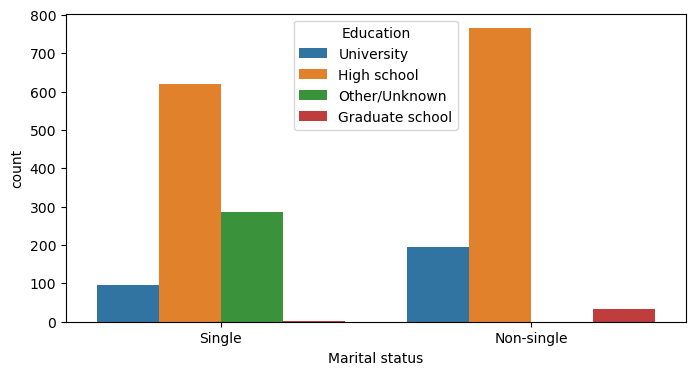

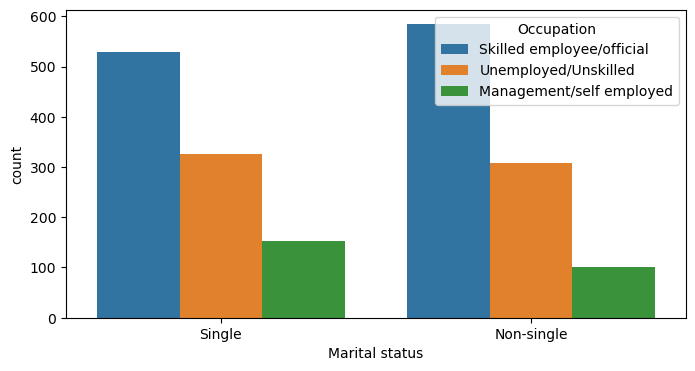

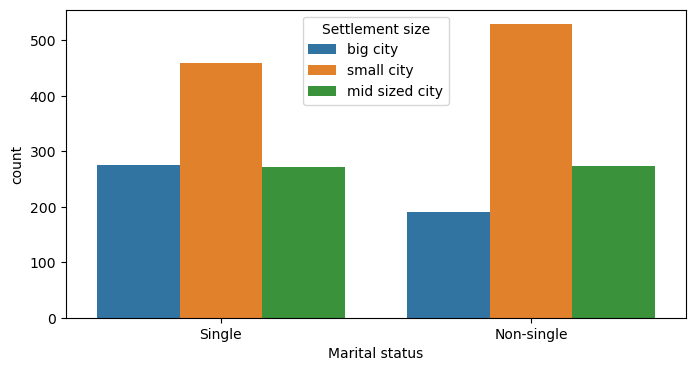

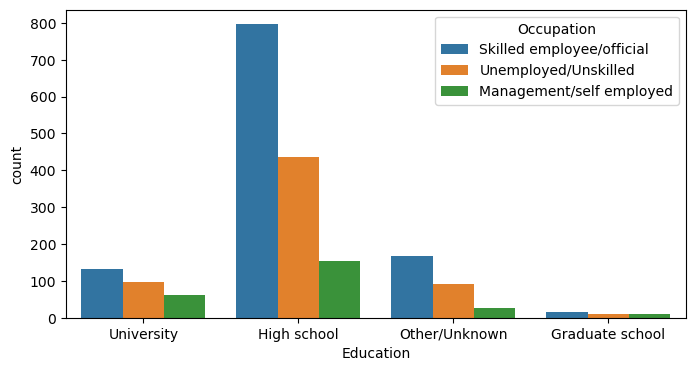

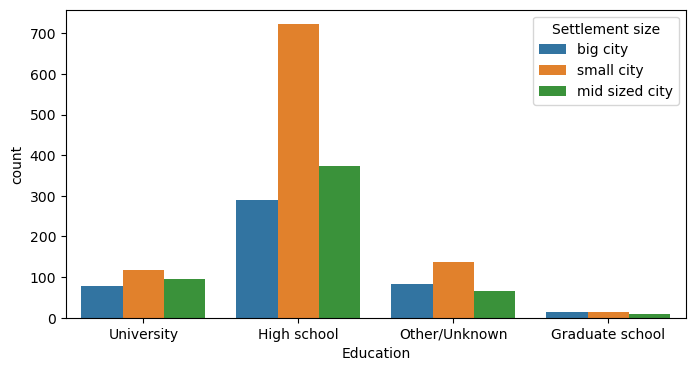

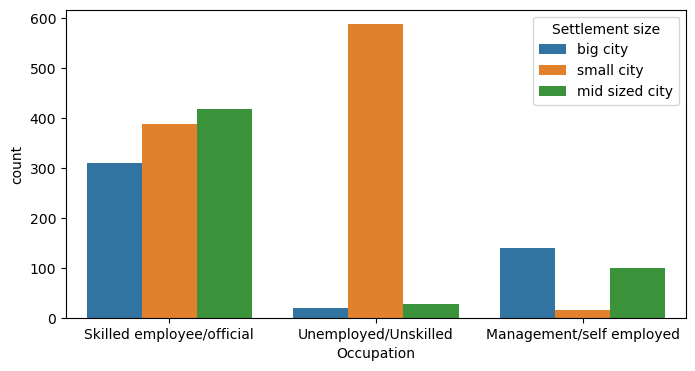

In [17]:
cat_copy=cat_columns.copy()
for category1 in cat_columns:
    cat_copy.pop(0);
    for category2 in cat_copy:
        if category1 != category2:
            plt.figure(figsize=(8,4))
            sns.countplot(data=customer_info, x=category1, hue=category2)

In [18]:
def bi_scatter(x,y,hue,df):
    plt.figure(figsize=(6,6))
    sns.scatterplot(x=x,y=y,data=df,hue=hue,alpha=0.85)


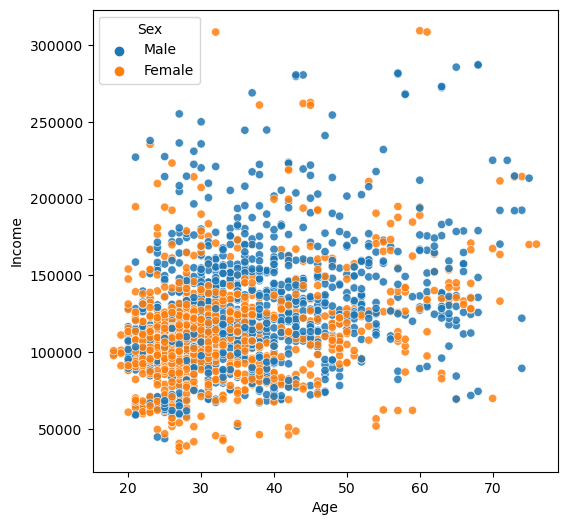

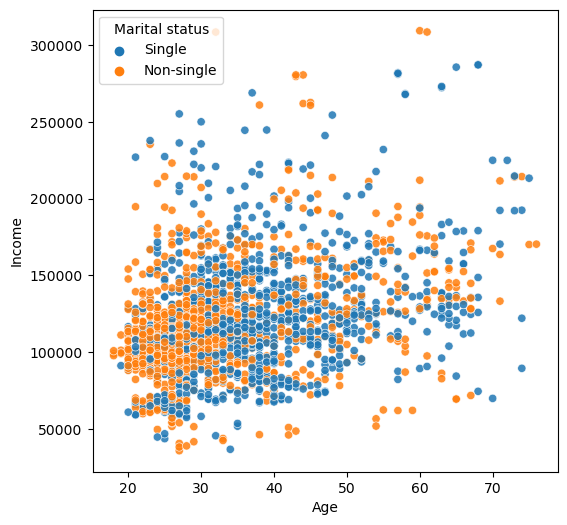

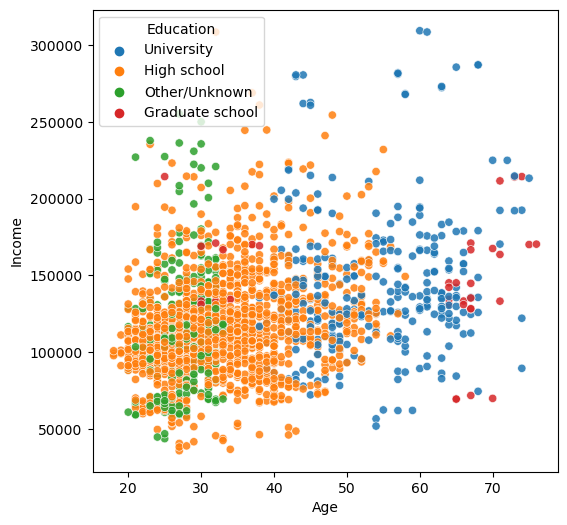

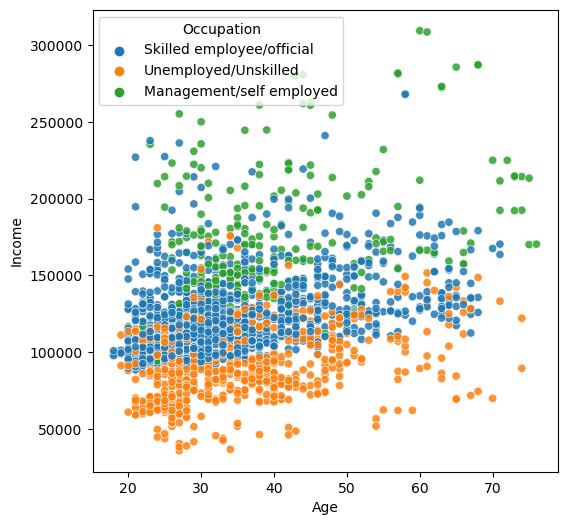

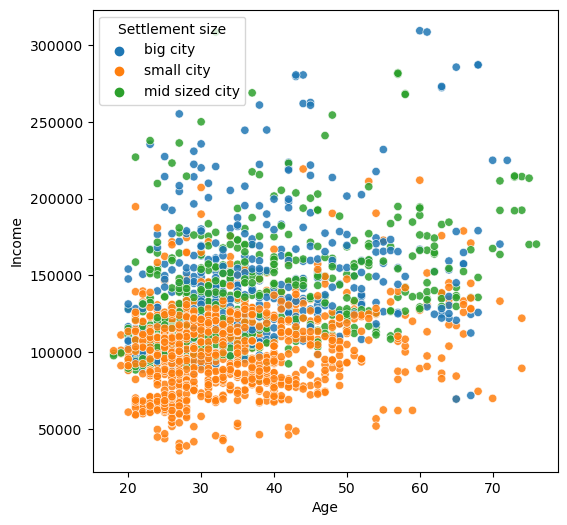

In [19]:
for cat in cat_columns:
    bi_scatter('Age','Income',cat,customer_info)

our data is right skewed so we have to transform it

In [20]:
def apply_log(column):
    return np.log(column)

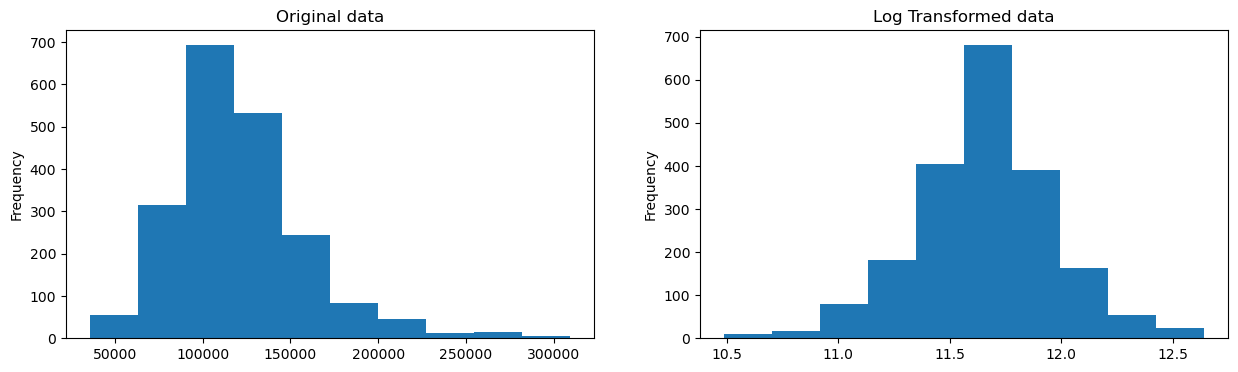

In [21]:
# Log Transform data
log_transformed_income = apply_log(customer_info['Income'])

# Create axis for original data plot (ax1) and transformed data (ax2)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,4));

# Plot original data & get metrics
customer_info['Income'].plot(kind='hist', ax=ax1)
ax1.title.set_text('Original data')

# Plot log transformed data & get metrics
log_transformed_income.plot(kind='hist', ax=ax2);
ax2.title.set_text('Log Transformed data')

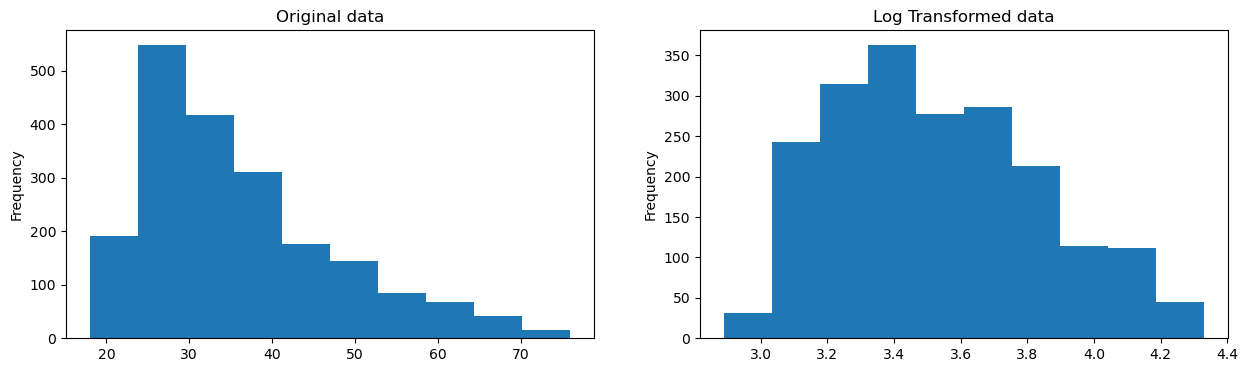

In [22]:
# Log Transform data
log_transformed_age = apply_log(customer_info['Age'])

# Create axis for original data plot (ax1) and transformed data (ax2)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,4));

# Plot original data & get metrics
customer_info['Age'].plot(kind='hist', ax=ax1)
ax1.title.set_text('Original data')

# Plot log transformed data & get metrics
log_transformed_age.plot(kind='hist', ax=ax2);
ax2.title.set_text('Log Transformed data')


In [23]:
customer_info['transformed_income'] = log_transformed_income
customer_info['transformed_age']    = log_transformed_age

In [24]:
customer_transformed = customer_info.drop(['Income', 'Age'], axis=1)
customer_transformed

,Sex,Marital status,Education,Occupation,Settlement size,transformed_income,transformed_age
0,Male,Single,University,Skilled employee/official,big city,11.733426,4.204693
1,Female,Non-single,High school,Skilled employee/official,big city,11.923531,3.091042
2,Male,Single,High school,Unemployed/Unskilled,small city,11.398748,3.891820
3,Male,Single,High school,Skilled employee/official,mid sized city,12.052717,3.806662
4,Male,Single,High school,Skilled employee/official,mid sized city,11.911910,3.970292
...,...,...,...,...,...,...,...
1995,Female,Single,High school,Unemployed/Unskilled,small city,11.724199,3.850148
1996,Female,Non-single,High school,Skilled employee/official,small city,11.676268,3.295837
1997,Male,Single,Other/Unknown,Unemployed/Unskilled,small city,11.366743,3.433987
1998,Female,Non-single,High school,Unemployed/Unskilled,small city,11.492396,3.178054


now we need to scale variables to range from 0 to 1 because some clustering algorithms are sensitive to the scale of features 
because they use distance measures
but first reverse mapping

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
# Reverse the mappings for each column
customer_transformed['Sex'] = customer_info['Sex'].map({'Male': '0', 'Female': '1'}).astype(int)
customer_transformed['Marital status'] = customer_info['Marital status'].map({'Single': '0', 'Non-single': '1'}).astype(int)
customer_transformed['Education'] = customer_info['Education'].map({'Other/Unknown': '0', 'High school': '1', 'University': '2', 'Graduate school': '3'}).astype(int)
customer_transformed['Occupation'] = customer_info['Occupation'].map({'Unemployed/Unskilled': '0', 'Skilled employee/official': '1', 'Management/self employed': '2'}).astype(int)
customer_transformed['Settlement size'] = customer_info['Settlement size'].map({'small city': '0', 'mid sized city': '1', 'big city': '2'}).astype(int)
customer_transformed.head()

,Sex,Marital status,Education,Occupation,Settlement size,transformed_income,transformed_age
0,0,0,2,1,2,11.733426,4.204693
1,1,1,1,1,2,11.923531,3.091042
2,0,0,1,0,0,11.398748,3.891820
3,0,0,1,1,1,12.052717,3.806662
4,0,0,1,1,1,11.911910,3.970292


In [27]:
scaler = MinMaxScaler()
scaler.fit(customer_transformed)
x=customer_transformed.drop(columns=['transformed_income'])

now we will use kmeans method for clustering

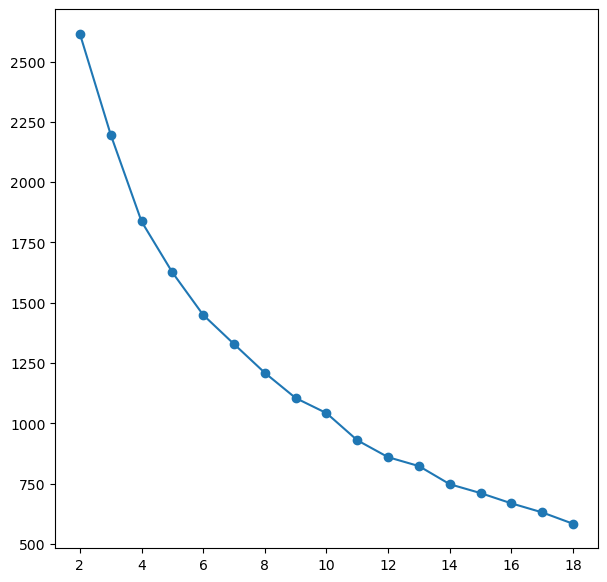

In [28]:
#trazimo broj klastera elbow metoda
from sklearn.cluster import KMeans

clusters_range=np.arange(2, 19)
inertias=[]

for c in clusters_range:
    kmeans=KMeans(n_clusters=c,n_init=10,random_state=0).fit(x)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(7,7))
plt.plot(clusters_range,inertias,marker='o')

In [29]:
%config Completer.use_jedi = False

In [30]:
from sklearn.metrics import silhouette_samples, silhouette_score

clusters_range=range(2, 20)
random_range  =range(0, 10)
results=[]

for c in clusters_range:
    for r in random_range:
        clusterer=KMeans(n_clusters=c,n_init=3, random_state=r)
        cluster_labels=clusterer.fit_predict(x)
        silhouette_avg=silhouette_score(x, cluster_labels)
        results.append([c,r,silhouette_avg])

result=pd.DataFrame(results, columns=["n_clusters","seed","silhouette_score"])

# Group by number of clusters and calculate the mean silhouette score
mean_scores = result.groupby('n_clusters')['silhouette_score'].mean()

# Plot the silhouette scores
plt.plot(mean_scores.index, mean_scores.values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Mean Silhouette Score')
plt.title('Mean Silhouette Score vs. Number of Clusters')
plt.grid(True)
plt.show()

KeyboardInterrupt: 

In [31]:
kmeans=KMeans(n_clusters=6,random_state=0).fit(x)

In [32]:
results_df = customer_info.drop(['transformed_income', 'transformed_age'], axis=1)
results_df['Labels'] = kmeans.labels_
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Sex              2000 non-null   object
 1   Marital status   2000 non-null   object
 2   Age              2000 non-null   int64 
 3   Education        2000 non-null   object
 4   Income           2000 non-null   int64 
 5   Occupation       2000 non-null   object
 6   Settlement size  2000 non-null   object
 7   Labels           2000 non-null   int32 
dtypes: int32(1), int64(2), object(5)
memory usage: 117.3+ KB


now we are going to see how each cluster we got looks like

In [33]:
summary={}

for index in range(6):
    summary[index]=results_df[results_df['Labels']==index].describe().T

In [34]:
def plot_categories(df):
    for cat_column in cat_columns:
        plt.figure(figsize=(8, 4))
        df.groupby(cat_column).size().plot(kind='bar')
        plt.show()

In [35]:
summary[0]

,count,mean,std,min,25%,50%,75%,max
Age,280.0,31.417857,8.981484,18.0,26.00,29.0,34.25,65.0
Income,280.0,118781.967857,20848.742993,89863.0,104123.25,114598.5,126017.00,211229.0
Labels,280.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0


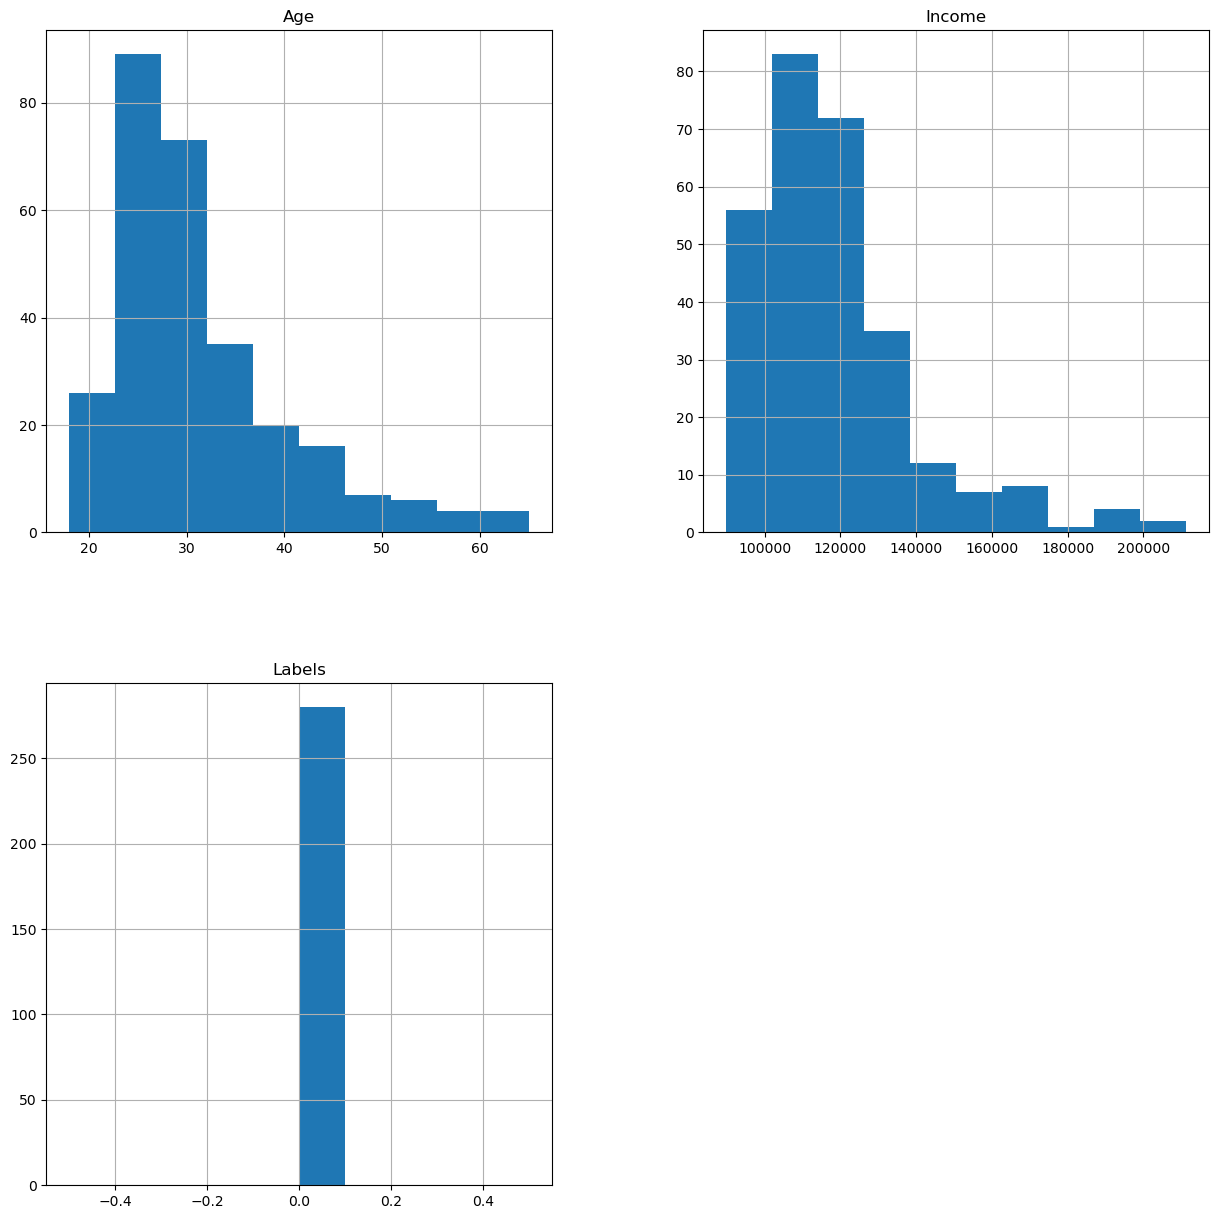

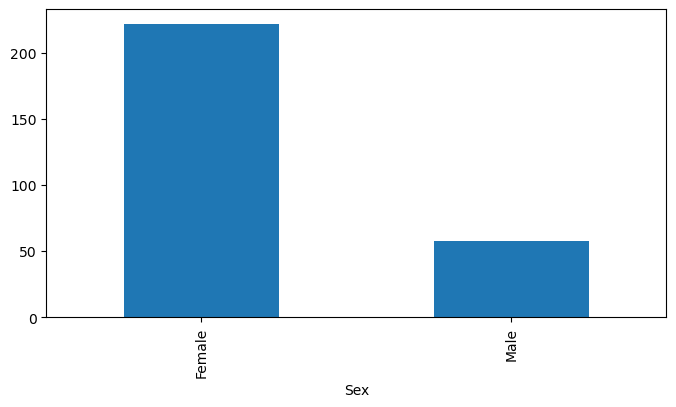

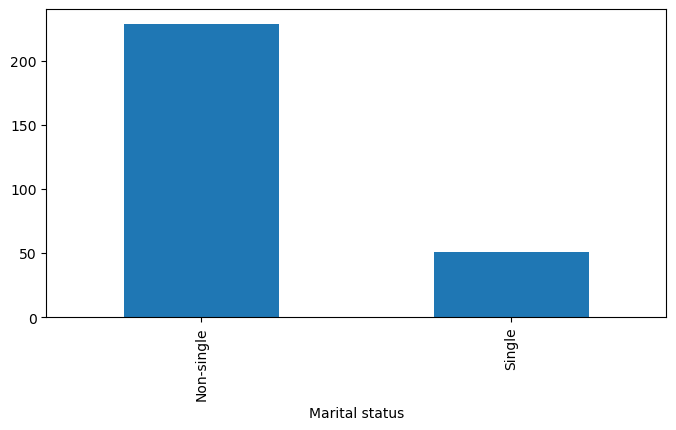

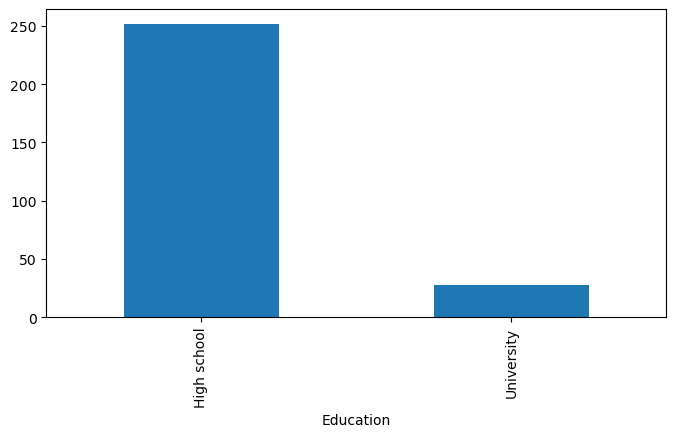

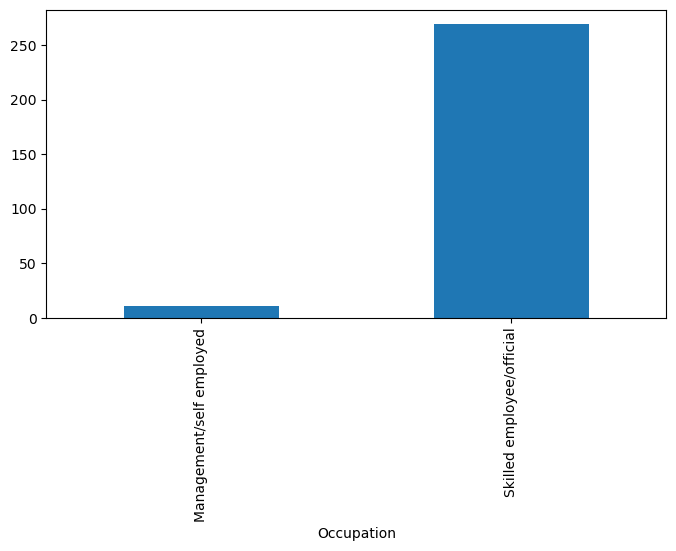

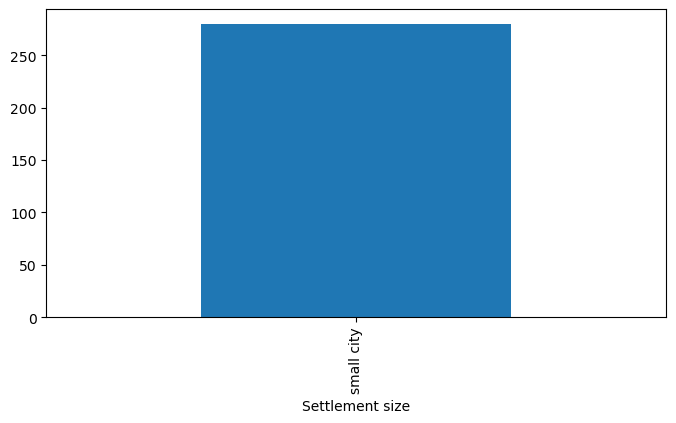

In [36]:
results_df[results_df['Labels']==0].hist(figsize=(15,15))
plot_categories(results_df[results_df['Labels']==0])

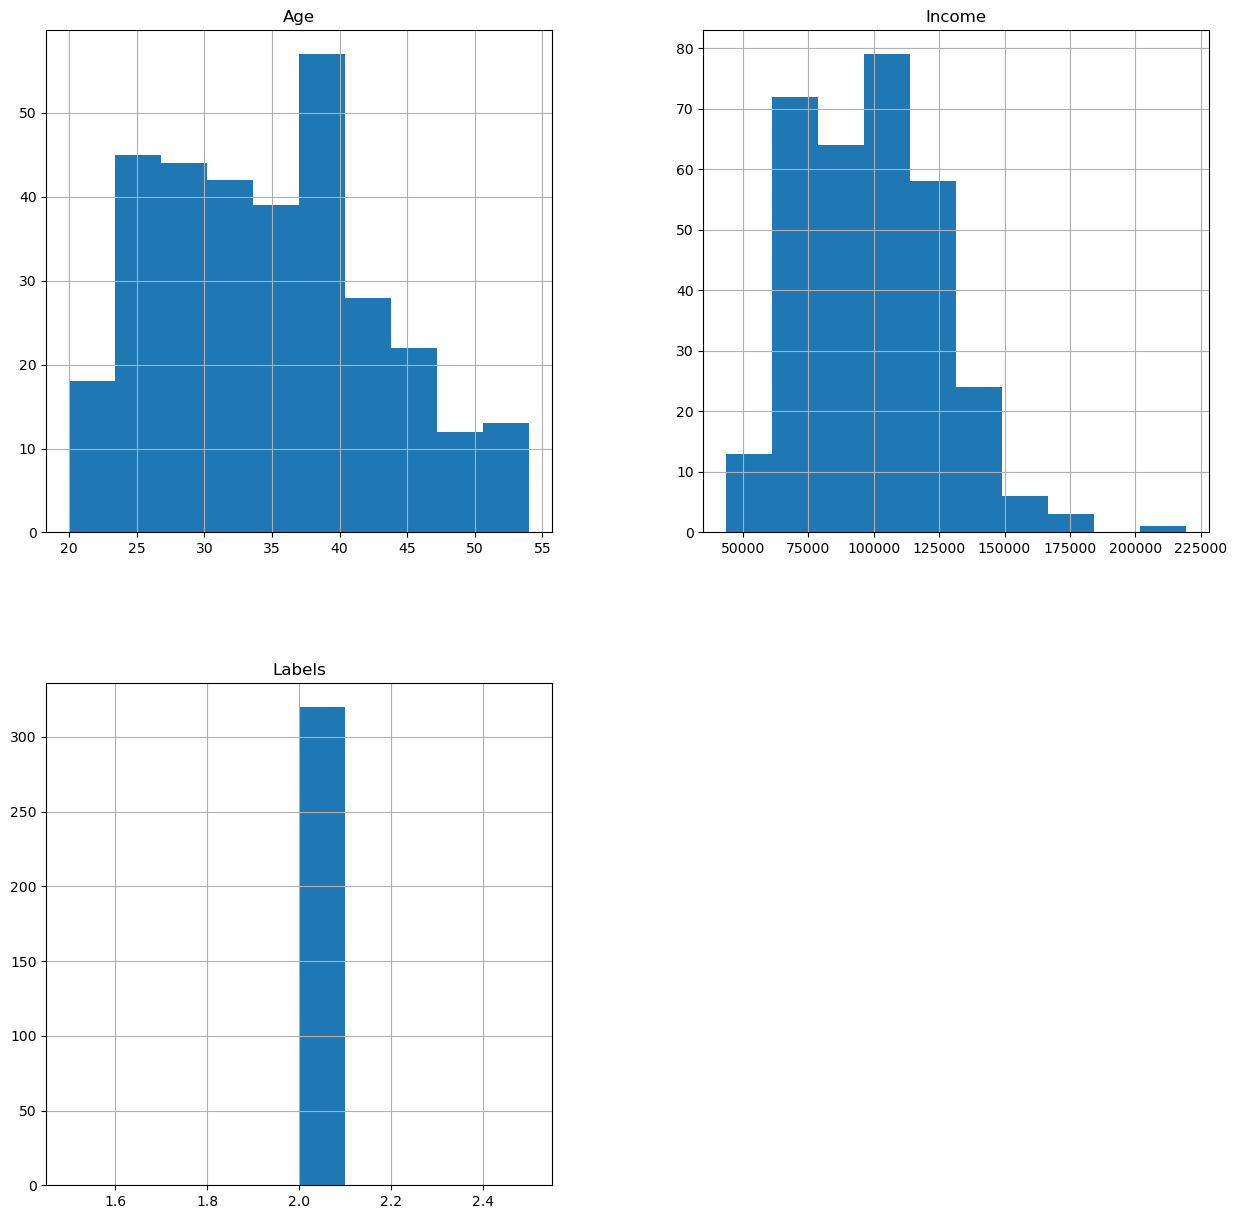

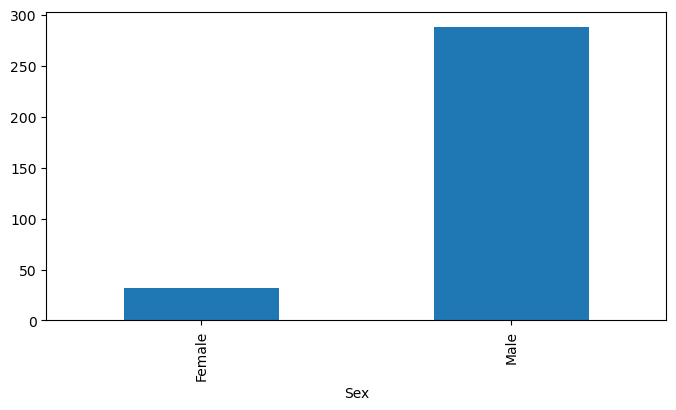

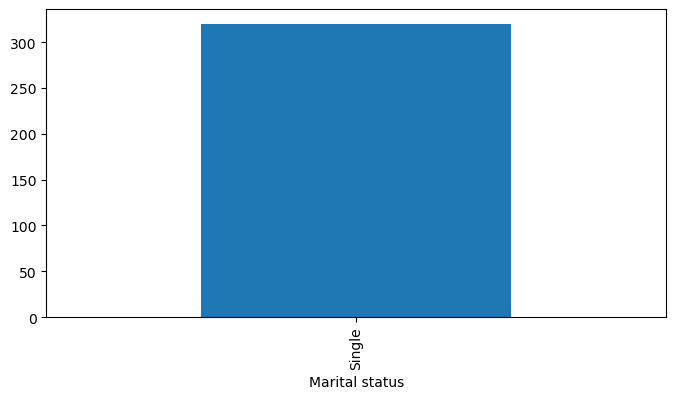

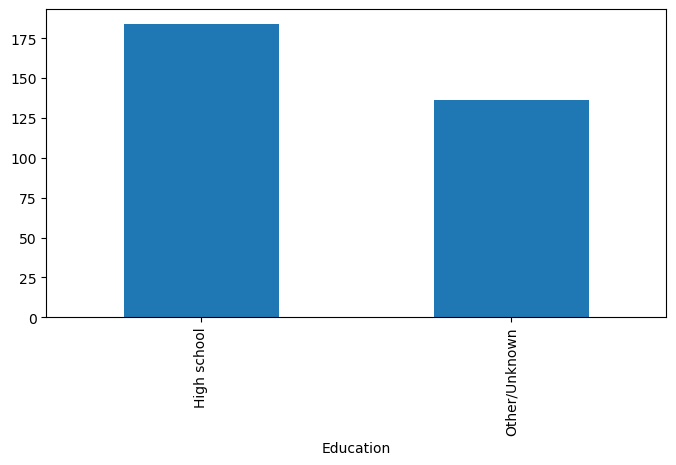

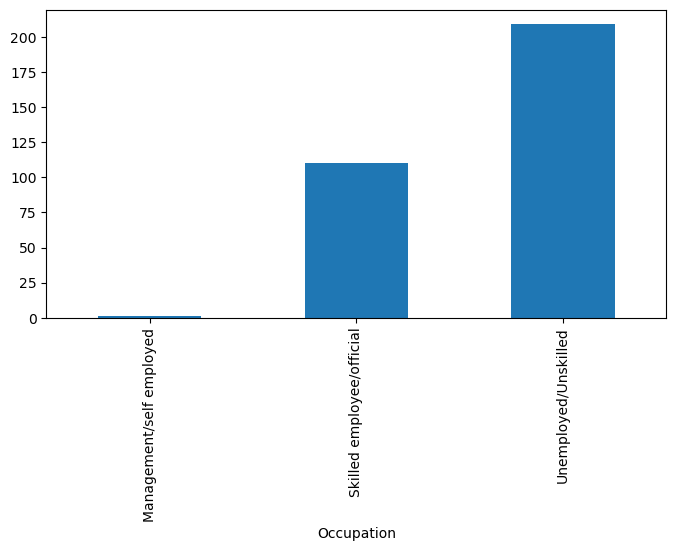

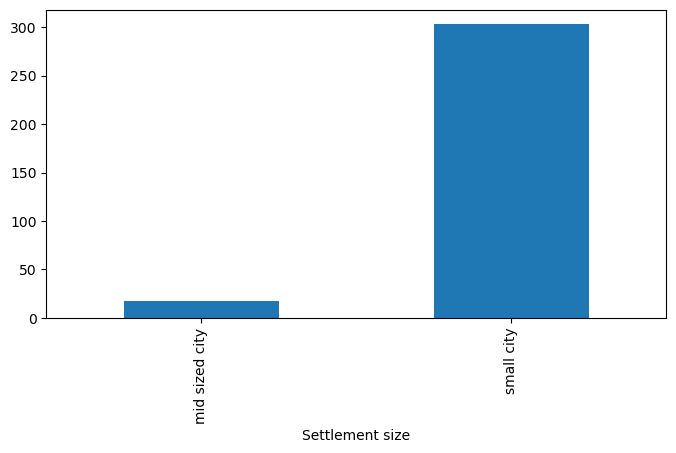

In [37]:
results_df[results_df['Labels'] == 2].hist(figsize=(15,15))
plot_categories(results_df[results_df['Labels']==2])

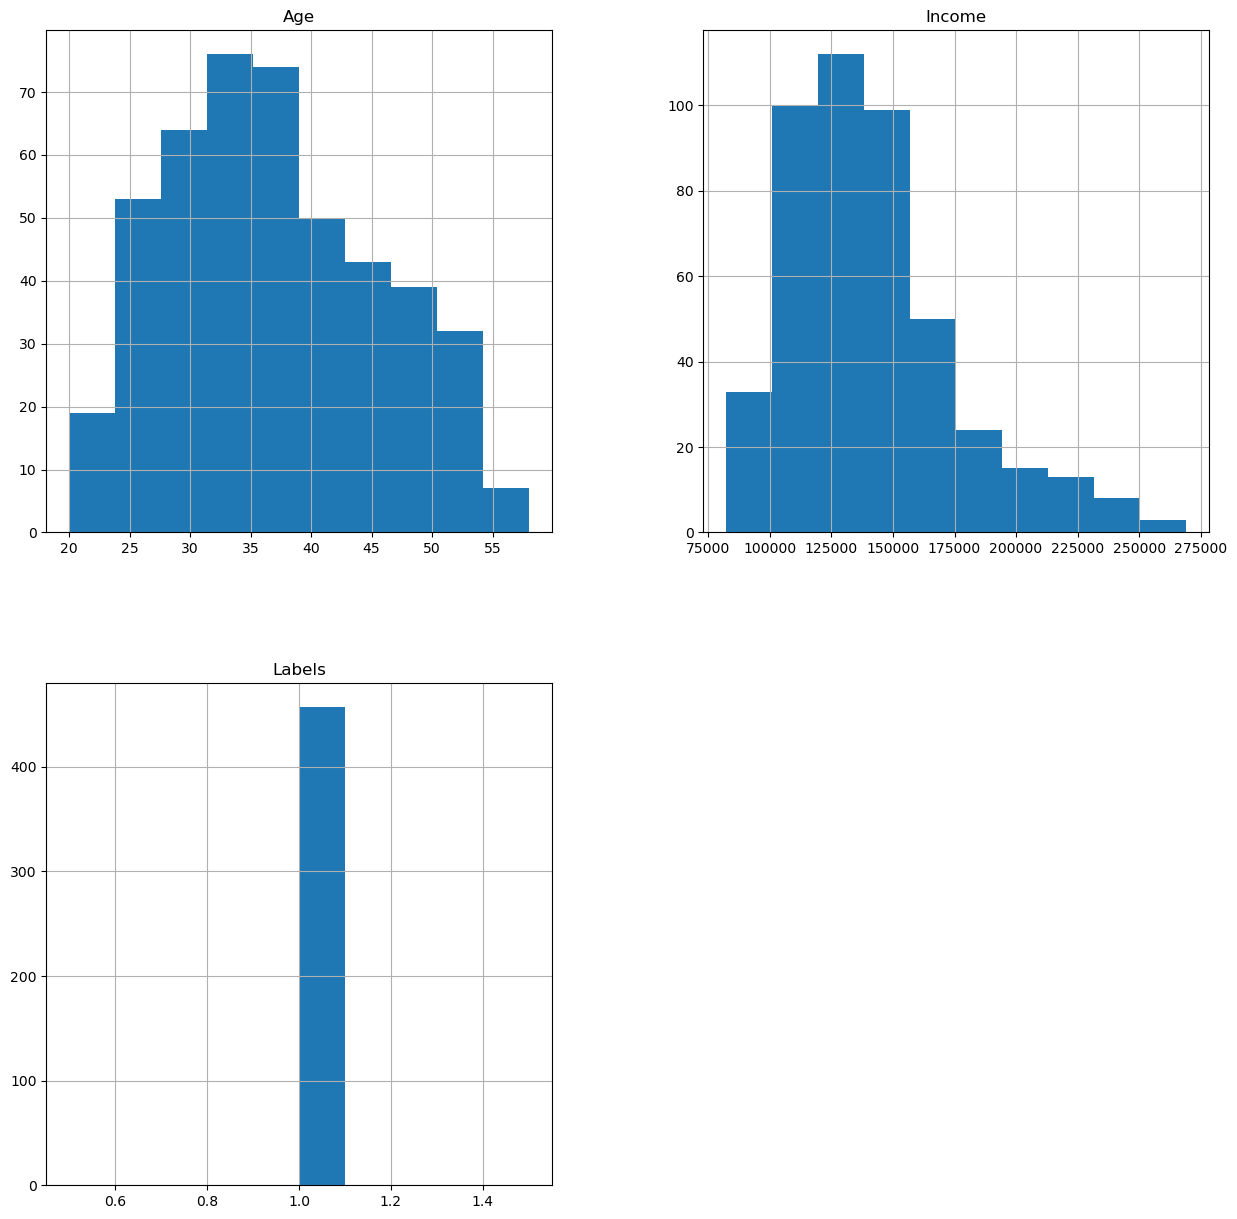

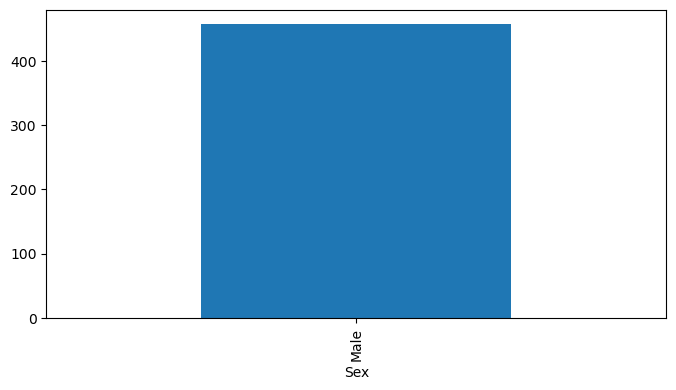

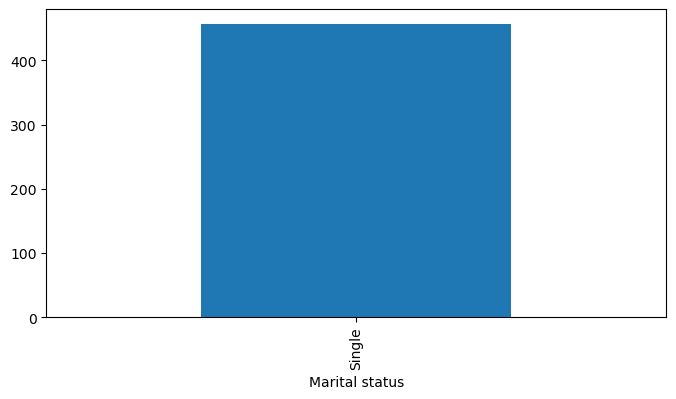

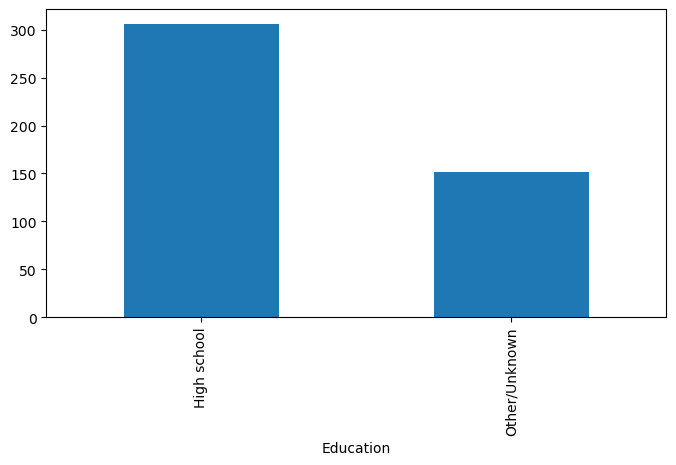

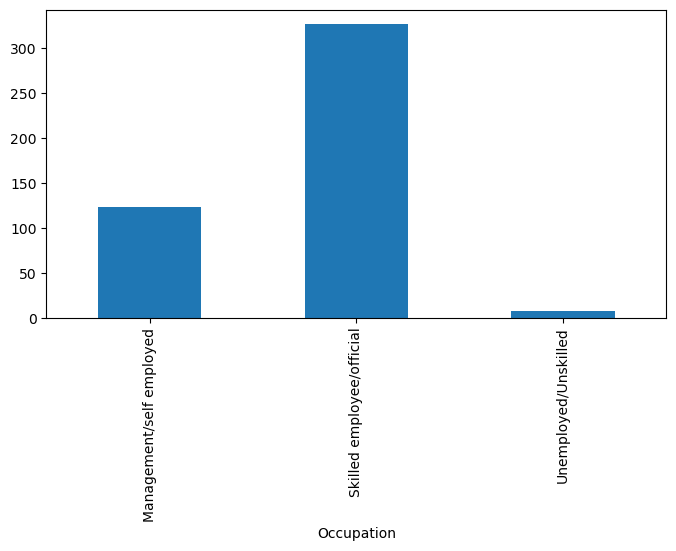

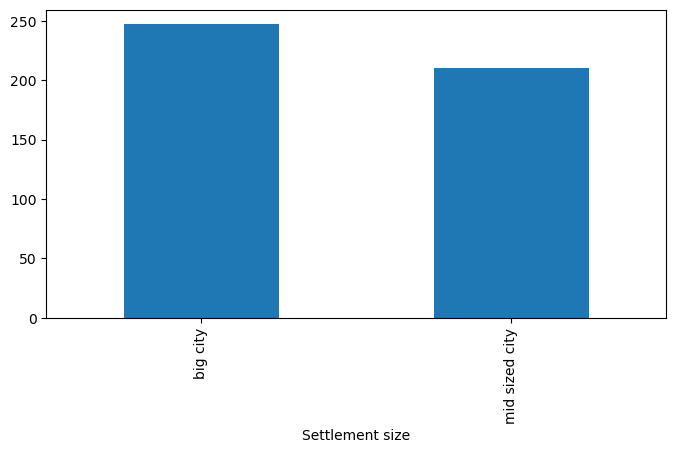

In [38]:
results_df[results_df['Labels'] == 1].hist(figsize=(15,15))
plot_categories(results_df[results_df['Labels']==1])

now we will use random forest to see how our predictions behave

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
def map_values(df):
    df['Sex'] = df['Sex'].map({'Male': '0', 'Female': '1'}).astype(int)
    df['Marital status'] = df['Marital status'].map({'Single': '0', 'Non-single': '1'}).astype(int)
    df['Education'] = df['Education'].map({'Other/Unknown': '0', 'High school': '1', 'University': '2', 'Graduate school': '3'}).astype(int)
    df['Occupation'] = df['Occupation'].map({'Unemployed/Unskilled': '0', 'Skilled employee/official': '1', 'Management/self employed': '2'}).astype(int)
    df['Settlement size'] = df['Settlement size'].map({'small city': '0', 'mid sized city': '1', 'big city': '2'}).astype(int)

In [41]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [42]:
map_values(results_df)

X_clusters = results_df.drop('Labels', axis=1)
y_clusters = results_df['Labels']

# Fit the Random Forest classifier to the data
rf_classifier.fit(X_clusters, y_clusters)

RandomForestClassifier(random_state=42)

In [43]:
from sklearn.metrics import classification_report, confusion_matrix

In [44]:
predicted_labels = rf_classifier.predict(X_clusters)

print(classification_report(y_clusters, predicted_labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       280
           1       1.00      1.00      1.00       457
           2       1.00      1.00      1.00       320
           3       1.00      1.00      1.00       203
           4       1.00      1.00      1.00       401
           5       1.00      1.00      1.00       339

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

